In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = () => false

<IPython.core.display.Javascript object>

# Analysis of Estimation Quiz

This hastily pulled together analysis looks at the results of the [quiz](https://docs.google.com/forms/d/e/1FAIpQLSfx7gpzxlDIW1qtMIwS0ehkmEdL5ZC5CorkWt55-1d8Pz8Ijg/viewform). The design of the experiment takes inspiration from the well-known Dunning-Kruger [1] study into the relationship between competence and self-assessed performance.

During the marking of the quiz questions were deemed correct if the true answer fell between the minimum and maximum answer bounds (inclusive).

[1]: <https://psycnet.apa.org/doiLanding?doi=10.1037%2F0022-3514.77.6.1121>Kruger, Justin; Dunning, David (1999). "Unskilled and Unaware of It: How Difficulties in Recognizing One's Own Incompetence Lead to Inflated Self-Assessments". _Journal of Personality and Social Psychology_. **77** (6): 1121–1134

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [9.5, 6]
from IPython.display import display, Markdown

import numpy as np
from io import StringIO
questions = [["How many songs did the Beatles record and release?", 305],
["On average how many rainy days are there in London each year?", 106],
["How many Siberian tigers remain in the wild?", 540],
["How many grams of fat in a typical butter croissant?", 14],
["How many known species of ant are there in the world?", 12500],
["In meters, how tall is the Eiffel tower?", 324],
["How many people in USA have the name \"John Smith\"?", 47947],
["What is the life expectancy of a chimpanze in years?", 39],
["According to the UN, how many countries are there in Asia?", 48],
["On average, how many sesame seeds are there on a Big Mac Bun?", 178],
["In cm, how long is the longest cucumber ever grown?", 107],
["How many hours would it take to watch the Star Wars movies back to back?", 26],
["How many hours is the longest schueduled flight in the world?", 18.5],
["How many London Underground stations are there?", 270],
["How many humans have been in space?", 566],
["How many hazel nuts go into making a regular jar of Nutella?", 50],
["How many years old was Winston Churchill when he died?", 90],
["How many teeth does a cow have?", 32],
["One average how many eggs does a hen lay in a year?", 276],
["How many hours a week does an average American adult spend on their mobile?", 21]]
responses_txt = """120	180	40	197	50	500	2	3.5	500	3000	20	40	100000	350000	45	65	20	35	250	350	95	150	8	11	23	26	120	200	50	100	40	80	80	90	10	20	100	250	21	35	
60	120	20	80	25	1000	10	20	100	10000	100	200	1000	20000	35	65	20	40	100	500	50	250	16	20	18	22	150	250	100	300	200	2000	85	95	20	30	250	400	20	30	
80	200	180	280	50	500	10	30	1000	100000	80	150	50000	500000	30	80	10	30	20	50	100	200	15	30	20	30	30	60	300	800	500	1000	60	80	50	100	100	300	10	20	
30	150	30	150	1	300	5	30	50	50000	80	150	10000	50000000	5	50	10	80	100	800	40	150	10	20	20	48	50	140	30	60	5	40	50	90	20	50	100	10000	72	160	
50	200	30	200	1	500	5	50	10	1000	50	800	10000	1000000	35	85	20	100	100	1000	100	500	20	32	20	32	25	200	25	1000	3	3000	70	85	2	100	100	400	2	20	
120	250	150	200	1000	100000	20	100	10000	2000000	100	700	10000	100000	50	80	30	60	150	300	80	150	18	23	20	26	150	300	500	2000	10	100	60	85	16	40	300	1000	80	150	
55	100	70	190	5	75	10	30	80	180	200	310	10000	20000	35	70	25	40	50	100	40	80	15	22	15	19	150	175	100	200	150	200	70	90	26	40	52	70	14	28	
150	250	70	120	200	1000	10	20	5000	50000	200	300	50000	500000	20	35	40	50	30	200	30	80	25	40	18	19	200	300	300	1000	10	100	85	90	20	40	100	250	12	25	
100	220	250	300	50	150	20	30	2000	5000	220	280	5000000	8000000	20	35	12	20	20	30	50	120	8	12	18	23	250	400	120	200	10	20	72	78	20	24	300	320	10	16	
60	100	120	160	50	500	35	60	5000	50000	150	250	100000	500000	50	75	45	60	100	200	100	200	18	27	21	30	250	400	50	100	30	45	60	80	24	36	300	400	30	35	
100	200	60	120	100	2005	5	7	500	5000	100	200	10000	30000	30	40	25	40	50	150	1000	1500	20	30	22	26	100	140	20	35	500	799	80	88	20	40	250	450	15	25	
45	120	100	200	30	80	3	10	300	1000	100	300	50000	700000	20	50	20	80	90	300	100	500	20	40	20	30	50	90	60	150	400	1000	70	95	25	40	40	80	12	35	
20	200	40	200	3	70	1	5	1000	20000	50	200	10000	20000000	10	70	5	35	40	300	50	200	6	25	15	30	70	200	5	20	12	400	55	95	5	50	100	1000	20	100	
120	500	60	120	200	2000	5	15	1000	10000	180	300	8000	50000	50	80	25	50	50	200	200	400	10	20	18	28	200	300	30	150	50	150	66	75	20	40	1500	4000	7	21	
30	120	45	180	1	200	20	50	10	4000	35	220	10000	750000	25	60	20	35	50	300	40	2000	18	32	18	36	80	140	30	70	30	160	75	95	24	36	90	210	7	49	
100	500	50	150	10	10000	5	50	3	50	200	250	5000	50000	30	80	50	100	500	2000	50	150	7	25	17	19	100	200	500	1000	30	500	60	80	20	50	150	400	20	50	
50	70	100	150	100	150	50	60	10000	3000000	100	300	100000	200000	40	55	50	60	100	300	500	600	20	25	16	18	100	200	20	40	100	500	80	95	30	40	200	300	40	60	
200	220	290	310	50	100	8	12	470	800	340	356	5000	8000	25	50	50	100	100	152	302	503.45	12	14	52	57	100	120	16	30	45	50.6	5	78	24	50.4	378	409	70	120	
200	230	60	80	250	300	16	24	460000	900000	130	160	200	350	49	70	57	140	100	130	70	180	19	21	15	19	60	120	30	50	5	10	49	60	23	25	60	180	3	7	
250	500	110	220	50	500	50	150	10000	30000	320	340	300000	700000	35	55	40	80	100	201	120	250	35	50	24	35	200	300	80	150	100	200	85	101	50	80	320	365	21	42	
100	380	100	300	200	1000	8	16	8000	100000	300	350	25000	750000	35	80	40	90	40	150	100	300	18	35	18	34	150	250	50	300	90	250	65	80	16	32	100	350	14	28	10
82	132	186	310	900	1100	3	8	12	15	326	386	74000	86000	13	19	43	46	8	22	7	10	12	16	36	42	22	33	226	345	65	98	78	88	43	47	22	36	35	47	4
60	120	20	40	50	200	5	25	250	1000	400	700	100000	300000	30	50	65	90	30	50	60	100	16	20	15	20	80	110	100	200	50	150	60	80	50	80	250	400	10	20	5
100	500	10	60	5	150	0.5	2	50	700	60	140	100	1500	50	90	30	52	20	50	50	150	18	27	25	45	100	200	40	100	9	25	65	85	30	45	150	390	28	42	0
50	500	100	300	50	5000	10	300	1	50	100	300	1	1000000	40	100	20	50	10	500	30	50	10	600	15	24	60	600	1	5	500	5000	40	90	10	100	10	50	20	72	5
100	400	100	250	25	100	60	150	1000	3000	250	400	500000	1000000	60	100	50	75	75	150	150	250	15	30	18	24	75	125	50	100	50	150	75	95	40	60	50	100	20	30	7
50	160	100	220	40	300	2	20	50	800	120	200	50000	200000	30	80	40	110	30	80	50	100	20	35	18	22	60	110	30	100	22	250	60	78	20	36	250	600	14	38	10
15	60	40	90	100	5000	2	12	20	300	100	200	5	100	8	25	150	165	80	220	50	80	17	23	15	22	50	100	30	80	25	80	45	70	30	60	245	270	10	26	16
175	450	35	240	5	5002	20	500	500	50000	150	600	45000	70000	11	90	25	48	200	1500	70	300	15	45	15	23	170	450	100	700	1	16	73	90	30	70	100	280	20	80	5
35	150	10	100	10	200	1	50	1	500	200	350	25000	1000000	5	25	25	100	35	100	100	1000	16	40	27	32	35	60	35	70	80	200	90	92	1	10	365	500	50	70	5
100	300	70	120	1	20	25	50	500	1000	800	1250	300000	800000	30	75	30	80	15	40	100	200	29	31	24	28	20	50	30	60	40	100	60	80	10	32	100	200	14	28	10
48	80	150	200	20	120	250	800	2000	8000	240	1200	24000	120000	32	80	80	110	120	300	120	240	9	12	18	19	32	48	12	21	16	32	68	74	48	84	50	80	100	160	14
60	500	50	250	1	100	1	20	100000	1000000	100	300	10000	50000	10	40	30	80	20	80	60	320	25	40	10	18	250	500	30	100	50	100	55	85	8	32	200	400	7	20	15
40	80	40	90	1	100	20	30	1000	3000	40	80	15000	30000	40	70	8	20	400	1000	50	80	18	25	11	17	40	80	40	200	300	1000	50	90	20	50	50	100	2	4	10
90	200	40	130	100	2000	10	40	50	1000	280	320	50000	5000000	40	75	30	60	200	800	100	250	20	25	13	16	240	260	100	350	10	50	80	95	20	30	20	50	20	40	11
100	200	50	150	30	100	5	30	1000	10000	50	400	10000	50000	10	50	10	30	30	150	30	50	20	30	10	16	50	150	100	500	10	300	70	90	20	40	100	300	2	20	15
140	190	210	290	40	130	35	65	25	105	85	140	800000	1500000	50	90	35	55	150	200	12	17	20	26	12	14	300	580	85	250	4	25	58	68	30	45	180	320	14	25	11
60	100	60	150	10	1000	5	20	30	400	150	500	20000	200000	20	80	30	60	50	300	40	120	18	27	16	24	150	350	50	1000	20	80	60	90	20	40	200	300	7	28	10
50	130	50	120	25	500	20	70	500	5000	75	125	10000	140000	20	40	35	40	100	500	85	150	19	27	17	19	220	240	30	70	15	60	70	85	20	45	150	700	20	40	16
100	250	180	300	800	1500	8	12	100	200	300	350	300000	900000	50	80	32	35	30	50	100	130	27	35	16	20	180	250	80	250	70	120	85	95	50	90	370	700	20	60	7
180	200	80	120	400	500	5	10	10000	12000	300	310	80000	300000	28	35	25	40	65	100	50	122	18	22	22	23	80	150	50	150	60	80	62	86	20	40	50	200	4	8	12
40	90	70	200	10	200	5	30	50	300	800	2000	5000	50000	20	40	15	30	50	150	40	80	14	20	15	18	100	200	100	300	100	500	60	90	20	40	365	900	30	50	7
100	300	100	200	100	5000	20	60	500	10000	50	200	1000	10000	25	50	25	45	150	500	50	150	16	22	17	19	200	300	50	100	100	300	60	80	25	45	100	200	21	35	14
80	160	60	160	100	5000	5	30	2000	50000	60	240	10000	800000	30	70	13	28	80	300	80	200	10	20	18	22	80	250	200	1500	150	350	62	95	20	50	150	400	20	40	16"""
raw_responses = np.genfromtxt(StringIO(responses_txt), delimiter='\t', filling_values=np.nan)
responses, self_scores = raw_responses[:, :40], raw_responses[:, 40]

# Number of responses
n = responses.shape[0]
responses = responses.reshape([n, 20, 2])
display(Markdown("""## The answers to all your questions

Due to the limitations of Google Forms it was not possible to randomise the order in which the
questions were presented so the effect of question ordering and anchoring could not be corrected for.

Number|Question|Answer
-|-|-\n{}


If you have any feedback regarding the accuracy of these anwers, your feedback is very important to us.
Please submit your corrections to �������@����.���.
""".format('\n'.join(f"{i+1}|{q[0]}|{q[1]}" for i, q in enumerate(questions)))))

## The answers to all your questions

Due to the limitations of Google Forms it was not possible to randomise the order in which the
questions were presented so the effect of question ordering and anchoring could not be corrected for.

Number|Question|Answer
-|-|-
1|How many songs did the Beatles record and release?|305
2|On average how many rainy days are there in London each year?|106
3|How many Siberian tigers remain in the wild?|540
4|How many grams of fat in a typical butter croissant?|14
5|How many known species of ant are there in the world?|12500
6|In meters, how tall is the Eiffel tower?|324
7|How many people in USA have the name "John Smith"?|47947
8|What is the life expectancy of a chimpanze in years?|39
9|According to the UN, how many countries are there in Asia?|48
10|On average, how many sesame seeds are there on a Big Mac Bun?|178
11|In cm, how long is the longest cucumber ever grown?|107
12|How many hours would it take to watch the Star Wars movies back to back?|26
13|How many hours is the longest schueduled flight in the world?|18.5
14|How many London Underground stations are there?|270
15|How many humans have been in space?|566
16|How many hazel nuts go into making a regular jar of Nutella?|50
17|How many years old was Winston Churchill when he died?|90
18|How many teeth does a cow have?|32
19|One average how many eggs does a hen lay in a year?|276
20|How many hours a week does an average American adult spend on their mobile?|21


If you have any feedback regarding the accuracy of these anwers, your feedback is very important to us.
Please submit your corrections to �������@����.���.


In [3]:
# Some pre-processed data that might come in useful later
answers = np.array([q[1] for q in questions])

# Build up masks for later question scoring
all_scores = (answers >= responses[:, :, 0]) & (answers <= responses[:, :, 1])
all_underestimates = (answers > responses[:, :, 1])
all_overestimates = (answers < responses[:, :, 0])

# Normalise response ranges by answers for later comparisons between questiosn
norm = np.repeat(np.dstack([answers, answers]), n, axis=0)
normed_responses = responses / norm

def confident_label(a, b):
    if a == b:
        return 'about right'
    elif a < b:
        return 'over'
    else:
        return 'under'

In [4]:
question_scores = all_scores.sum(axis=0)
hardest_question = np.argmin(question_scores)
easiest_question = np.argmax(question_scores)

question_underestimates = all_underestimates.sum(axis=0)
underestimated_question = np.argmax(question_underestimates)
mid_underestimate = np.median(responses[:, underestimated_question].mean(axis=1))

question_overestimates = all_overestimates.sum(axis=0)
overestimated_question = np.argmax(question_overestimates)
mid_overestimate = np.median(responses[:, overestimated_question].mean(axis=1))

output = f"""# Analysis of Questions

The easiest question '*{questions[easiest_question][0]}*' was correctly guessed by {question_scores[easiest_question]/n:.0%} of respondents.
The hardest question '*{questions[hardest_question][0]}*' was correctly guessed by {question_scores[hardest_question]/n:.0%} of respondents.

The average (mean) question was correctly guessed by {question_scores.mean()/n:.0%} of respondents.

Numerically, the most under-estimated question '*{questions[underestimated_question][0]}*' with a median  mid-range value of {mid_underestimate:,.0f} compared to the true value of {questions[underestimated_question][1]:,.0f}.
The most over-estimated question '*{questions[overestimated_question][0]}*'  with a median  mid-range value of {mid_overestimate:,.0f} compared to the true value of {questions[overestimated_question][1]:,.0f}.

"""
display(Markdown(output))

# Analysis of Questions

The easiest question '*How many teeth does a cow have?*' was correctly guessed by 70% of respondents.
The hardest question '*How many humans have been in space?*' was correctly guessed by 18% of respondents.

The average (mean) question was correctly guessed by 42% of respondents.

Numerically, the most under-estimated question '*How many humans have been in space?*' with a median  mid-range value of 102 compared to the true value of 566.
The most over-estimated question '*How many people in USA have the name "John Smith"?*'  with a median  mid-range value of 170,000 compared to the true value of 47,947.



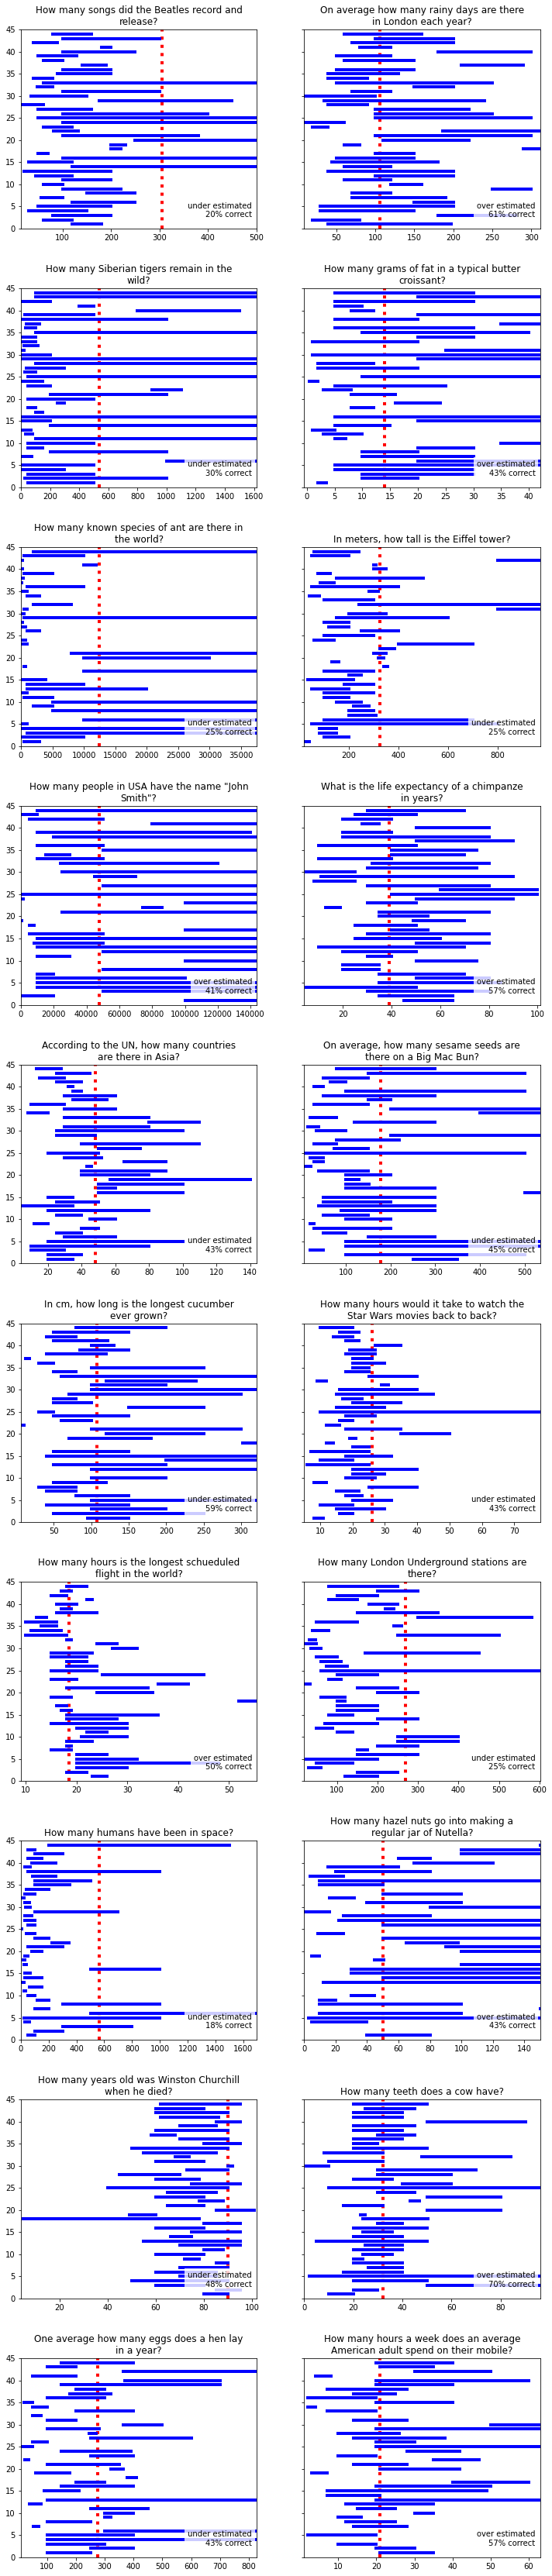

In [5]:
# Plot performance of individual questions

from textwrap import wrap
fig, axes = plt.subplots(10, 2, figsize=[12, 60], sharey=True)
for ia, ax in enumerate(axes.flat):
    answer = questions[ia][1]
    xlim = [responses[:,ia,0].min()-1, min(responses[:,ia,1].max()+1, answer*3)]
    ax.set(xlim=xlim, ylim=[0, n+1], title="\n".join(wrap(questions[ia][0], 42)))
    #ax.get_yaxis().set_visible(False)
    # Vertical reference line for true answers
    ax.axvline(answer, linewidth=4, color='r', linestyle=':')
    
    ax.text(0.98, 0.05, f'{confident_label(question_underestimates[ia], question_overestimates[ia])} estimated\n{question_scores[ia]/n:.0%} correct',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, bbox={'fc': 'white', 'alpha': 0.8, 'ec': 'none'})
    # Plot individual answers to questions
    for ir in range(n):
        ax.plot(responses[ir][ia], [ir+1, ir+1], 'b-', linewidth=4)
plt.subplots_adjust(hspace=0.3)

In [6]:
respondent_scores = all_scores.sum(axis=1)
highest_respondent = np.argmin(respondent_scores)
lowest_respondent = np.argmax(respondent_scores)

EXPECTED = int(20*0.8)
too_many = (respondent_scores > EXPECTED).sum()
too_few = (respondent_scores < EXPECTED).sum()

respondent_underestimates = all_underestimates.sum(axis=1)
respondent_overestimates = all_overestimates.sum(axis=1)


output = f"""# Analysis of respondents

{n} respondents participated.

The respondent with the lowest number of correct estimates got {respondent_scores[highest_respondent]/20:.0%} of questions right. The respondent with the greatest number of responses got {respondent_scores[lowest_respondent]/20:.0%} of questions right. 

The average respondent got {respondent_scores.mean()/20:.0%} of questions right.

{too_many/n:.0%} respondents got more than {EXPECTED} questions right and {too_few/n:.0%} got fewer than {EXPECTED} questions right. On the whole respondants were *{confident_label(too_many, too_few)} confident*.

"""
display(Markdown(output))

# Analysis of respondents

44 respondents participated.

The respondent with the lowest number of correct estimates got 0% of questions right. The respondent with the greatest number of responses got 90% of questions right. 

The average respondent got 42% of questions right.

5% respondents got more than 16 questions right and 95% got fewer than 16 questions right. On the whole respondants were *over confident*.



Text(0.5, 1.0, 'Histogram of responses')

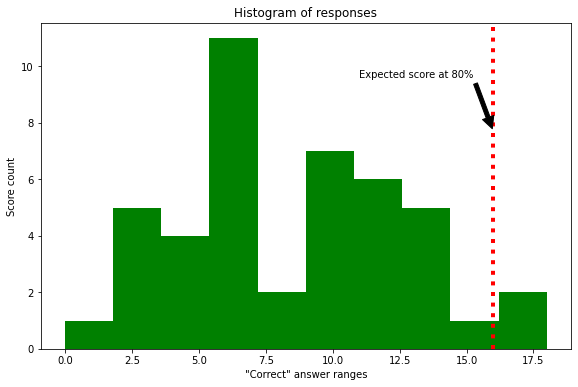

In [7]:
plt.hist(respondent_scores, fc='g')
ax = plt.gca()
ax.set(xlabel='"Correct" answer ranges', ylabel='Score count')
ax.axvline(EXPECTED, linewidth=4, color='r', linestyle=':')
ymax = plt.ylim()[1]
ax.annotate('Expected score at 80%', xy=(EXPECTED, ymax / 1.5), xytext=(11, ymax / 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_title('Histogram of responses')


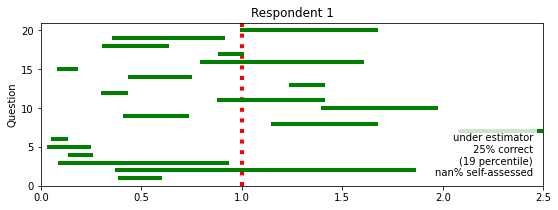

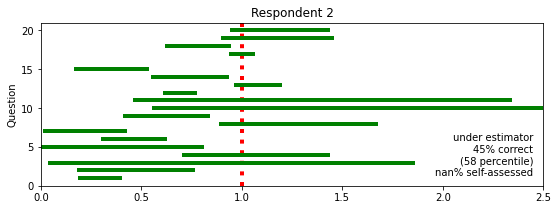

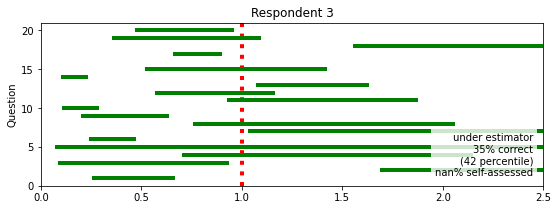

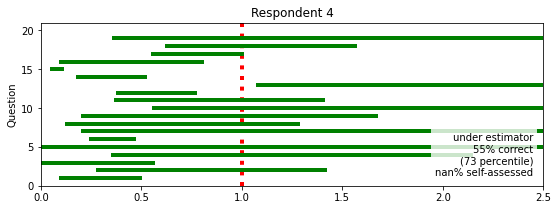

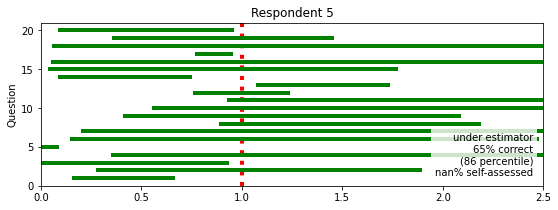

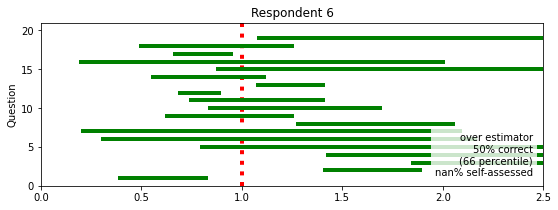

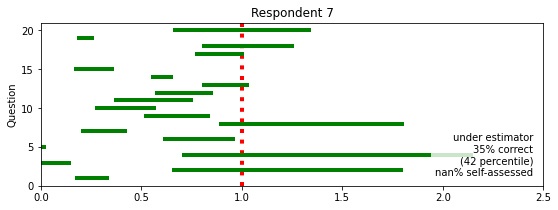

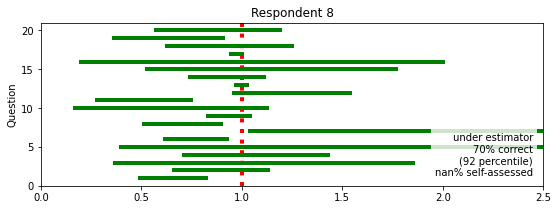

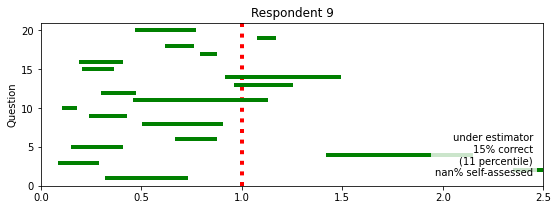

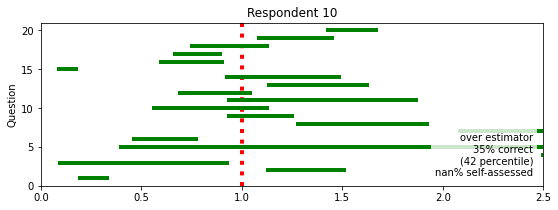

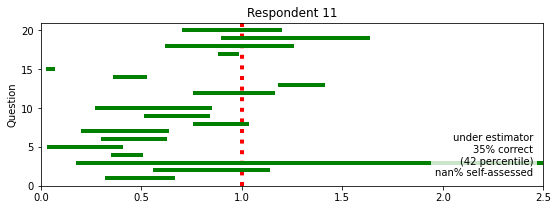

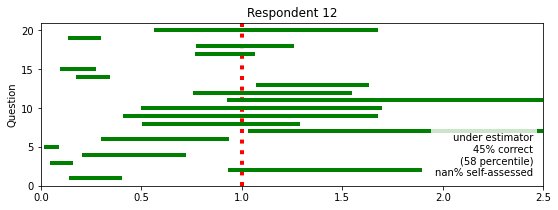

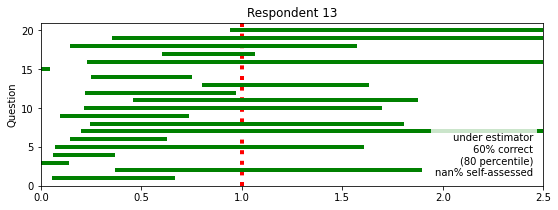

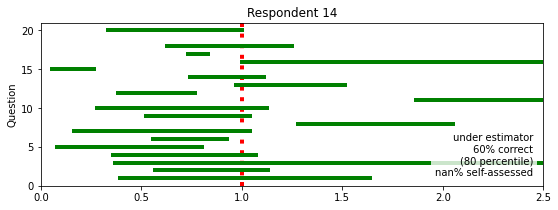

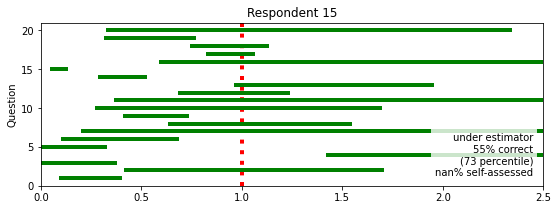

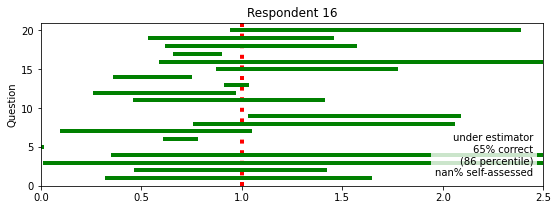

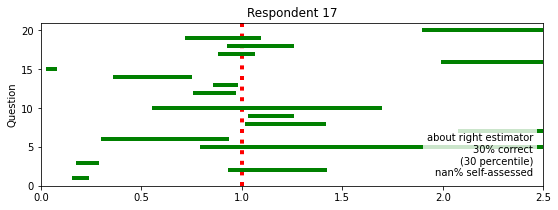

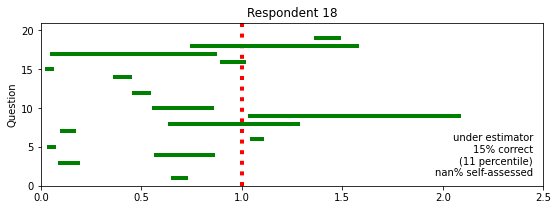

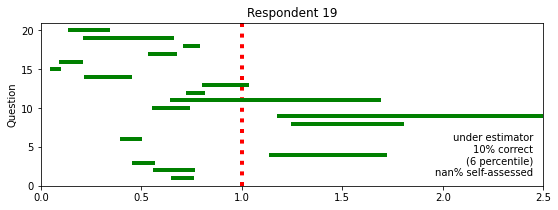

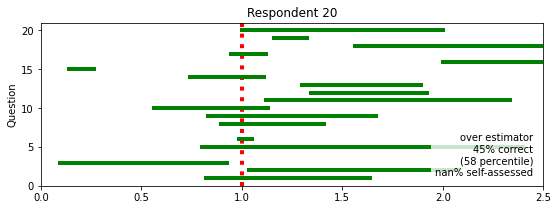

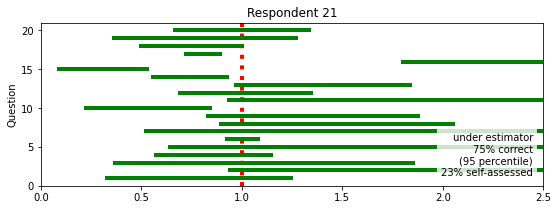

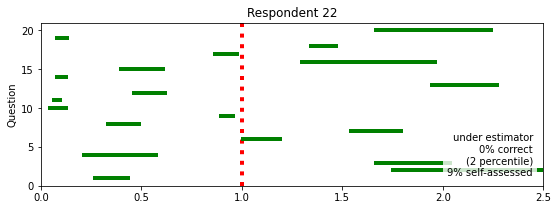

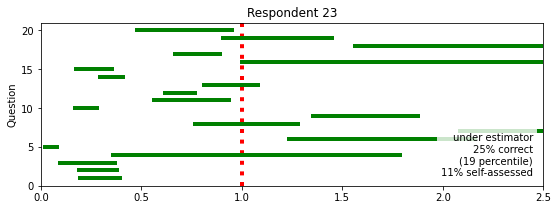

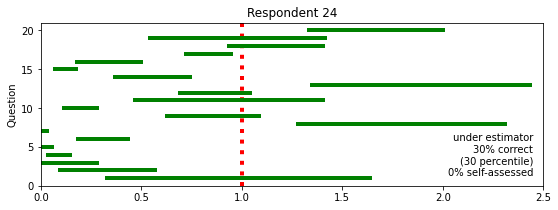

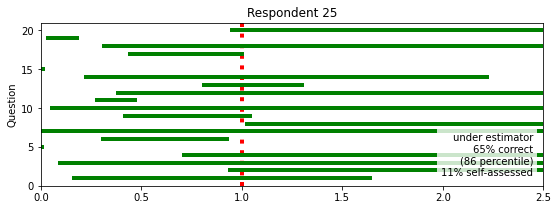

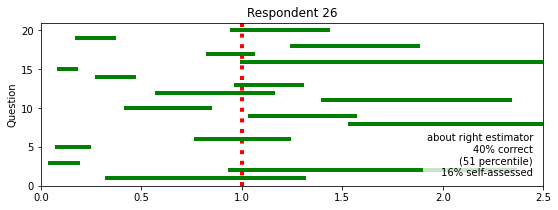

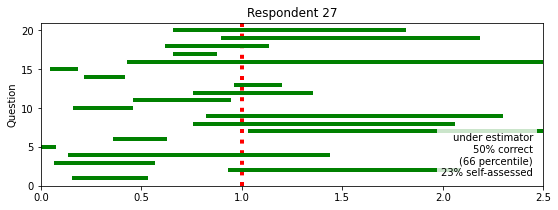

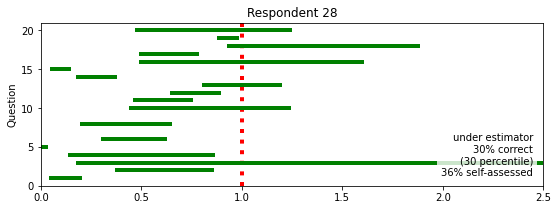

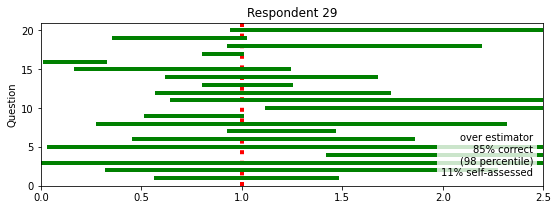

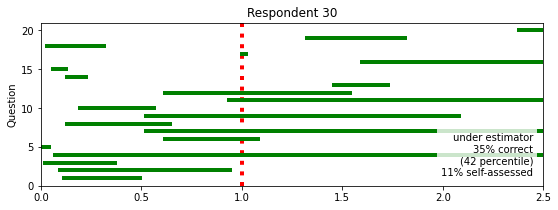

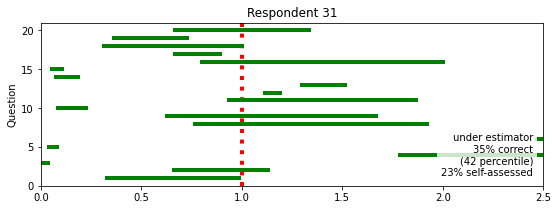

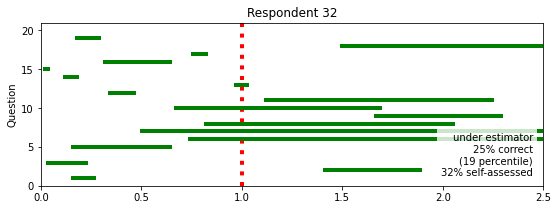

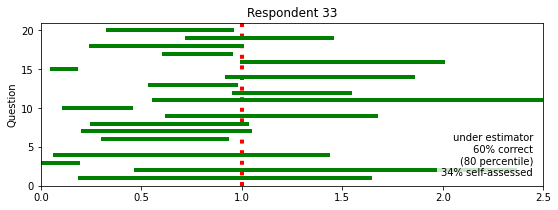

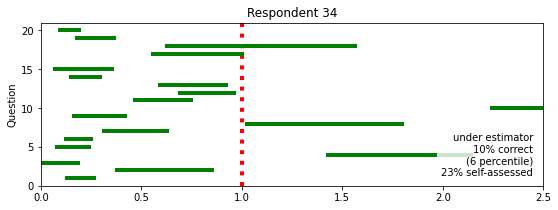

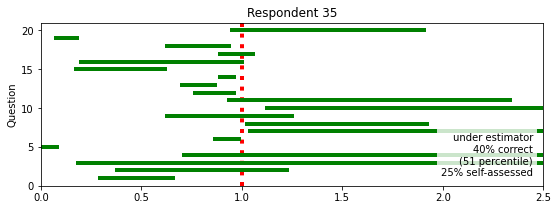

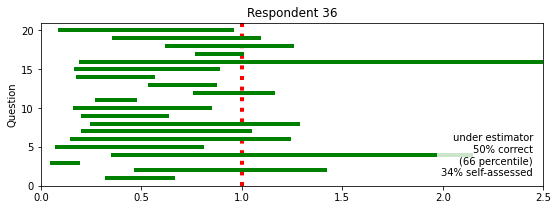

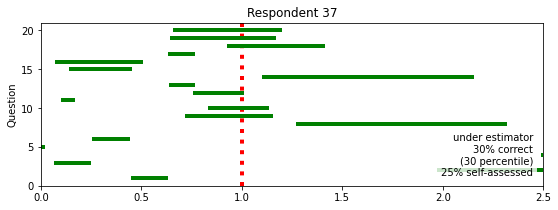

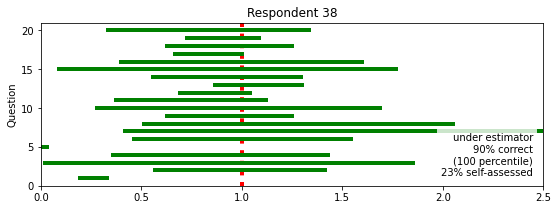

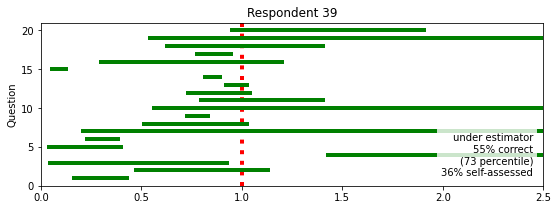

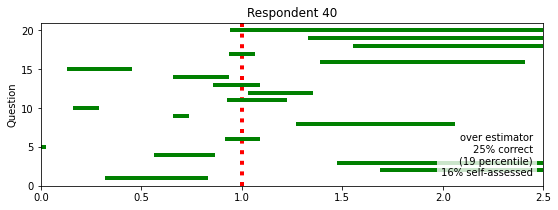

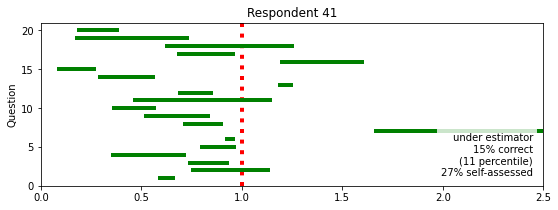

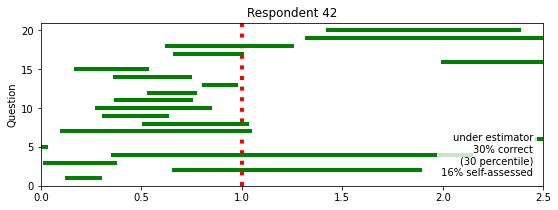

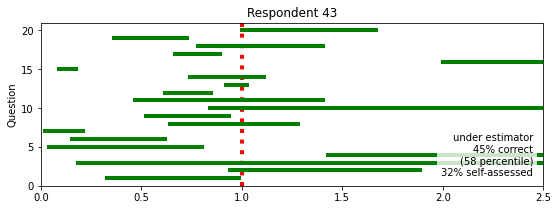

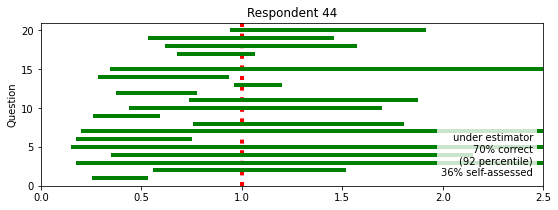

In [8]:
# Plot performance of individual questions
from scipy.stats import percentileofscore
for ir in range(n):
    plt.figure(figsize=(9,3))    
    ax = plt.gca()
    xlim = [0, min(responses[ir,:,1].max()+1, 2.5)]
    ax.set(xlim=xlim, ylim=[0, 21], title=f"Respondent {ir+1}", ylabel="Question")
    # Vertical reference line for true answers
    ax.axvline(1, linewidth=4, color='r', linestyle=':')

    ax.text(0.98, 0.05, f'{confident_label(respondent_underestimates[ir], respondent_overestimates[ir])} estimator\n{respondent_scores[ir]/20:.0%} correct\n({percentileofscore(respondent_scores, respondent_scores[ir]):0.0f} percentile)\n{self_scores[ir]/n:0.0%} self-assessed',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, bbox={'fc': 'white', 'alpha': 0.8, 'ec': 'none'})
    # Plot answers to questions
    for ia in range(20):
        ax.plot(normed_responses[ir][ia], [ia+1, ia+1], 'g-', linewidth=4)
    plt.show()


The average answer range and actual score are probably dependent (p = 1.178e-08).


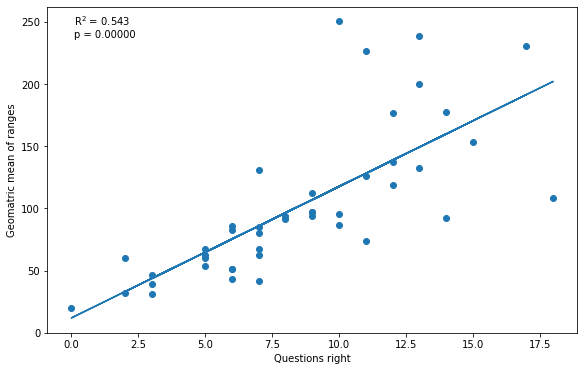

In [9]:
from scipy.stats import gmean, linregress
# Use geomatric mean to take average range as individual question ranges
# are measured in different units
gmean_range = gmean(responses[:, : , 1] - responses[:, : , 0], axis=1)
plt.scatter(respondent_scores, gmean_range)
ax = plt.gca()
reg = linregress(respondent_scores, gmean_range)

plt.plot(respondent_scores, np.polyval([reg.slope, reg.intercept], respondent_scores))
ax.set(xlabel="Questions right", ylabel="Geomatric mean of ranges")
ax.text(0.05, 0.90, f'R$^{{2}}$ = {reg.rvalue**2:.3f}\np = {reg.pvalue:.5f}',
        verticalalignment='bottom', horizontalalignment='left', transform=ax.transAxes)

PVALUE = 0.05
print("The average answer range and actual score are probably{}dependent (p = {:.3e}).".format(' in-' if reg.pvalue > PVALUE else ' ', reg.pvalue))

In [10]:
from scipy.stats import spearmanr, mode
spearmanr(respondent_scores, gmean_range)

SpearmanrResult(correlation=0.8558144865693462, pvalue=1.3439815878383686e-13)

Self-assessed scores varied between 0 and 16. The average self-assessment was 9.8 questions right.

38% performed at least as well as their self-assessment.



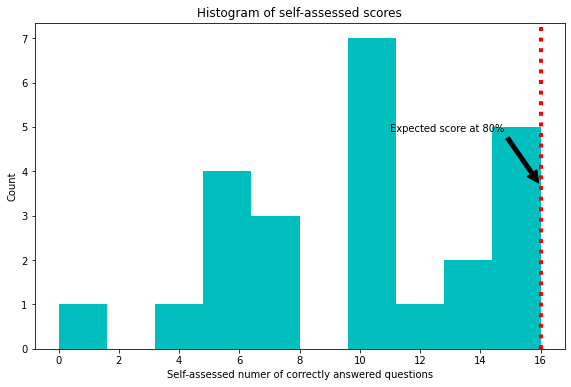

In [11]:
# Remove missing values as only started collecting half way through experiment
known_self_scores = self_scores[~np.isnan(self_scores)]
plt.hist(known_self_scores, fc='c')
ax = plt.gca()
ax.set(xlabel='Self-assessed numer of correctly answered questions', ylabel='Count')
ax.axvline(EXPECTED, linewidth=4, color='r', linestyle=':')
ymax = plt.ylim()[1]
ax.annotate('Expected score at 80%', xy=(EXPECTED, ymax/2), xytext=(11, ymax/1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_title('Histogram of self-assessed scores')

filtered_respondent_scores = respondent_scores[~np.isnan(self_scores)]
self_actual_comparison = filtered_respondent_scores >= known_self_scores

print(f"""Self-assessed scores varied between {known_self_scores.min():.0f} and {known_self_scores.max():.0f}. The average self-assessment was {known_self_scores.mean():.1f} questions right.

{self_actual_comparison.sum()/len(filtered_respondent_scores):.0%} performed at least as well as their self-assessment.
""")

The self-assessed score and actual score are probably in-dependent.


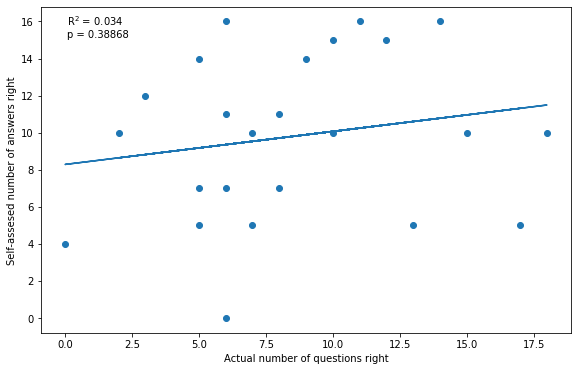

In [12]:
plt.scatter(filtered_respondent_scores, known_self_scores)
ax = plt.gca()
reg = linregress(filtered_respondent_scores, known_self_scores)
plt.plot(filtered_respondent_scores, np.polyval([reg.slope, reg.intercept], filtered_respondent_scores))
ax.set(xlabel="Actual number of questions right", ylabel="Self-assesed number of answers right")
ax.text(0.05, 0.90, f'R$^{{2}}$ = {reg.rvalue**2:.3f}\np = {reg.pvalue:.5f}',
        verticalalignment='bottom', horizontalalignment='left', transform=ax.transAxes)
print("The self-assessed score and actual score are probably{}dependent.".format(' in-' if reg.pvalue > PVALUE else ' '))